In [4]:
from turtle import distance
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import directed_hausdorff
%matplotlib inline


# Check curve lidar

In [20]:
def world_coordinates_to_image(self,world_point):    
    return (world_point*self.scale + np.array([self.translate_x, self.translate_y])).astype(int)   
    

In [29]:
scale = 0.63
translate_x = 149
translate_y = 61

    

def world_coordinates_to_image(world_point):    
    return (world_point*scale + np.array([translate_x, translate_y])).astype(int)   
    

In [30]:
def image_to_array(path): 
    
    print(path)
    gray_image = cv.cvtColor(path, cv.COLOR_BGR2GRAY)
    return gray_image

In [26]:
cd = pd.read_csv("../data/overall__imu__data.csv")


In [27]:
positions = np.stack([cd['positions_x_ground_truth'], -cd['positions_y_ground_truth']], axis=1)
orientations = cd['orientation_measurement']
image_positions = []
for p in positions: 
    image_positions.append(world_coordinates_to_image(p))
image_positions = np.array(image_positions)

TypeError: Image data of dtype <U32 cannot be converted to float

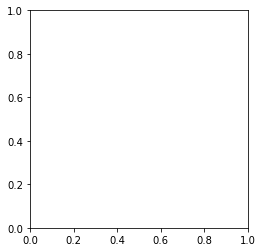

In [28]:
    
plt.scatter(positions[:,0], positions[:,1])
plt.scatter(positions[0,0], positions[0,1])


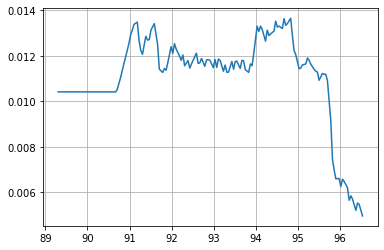

In [19]:
#plt.plot(cd['timestamps'], np.rad2deg(cd['orientation_measurement']))
plt.plot(cd['timestamps'], orientations)
plt.grid()

## Speichern der Distanzen 
Die Distanzen werden gespeichert und gemittelt (Median oder Mean). Anschließen wird dasselbe für die Messung getan. Aus dem Partikelresulatet wird eine Normalbverteilung erstellt, die MEssung wird in die PDF gegeben --> Gewicht